In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

/home/bears_bears/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/bears_bears/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
header = ["ydiffs","heights","distances","angles"]

In [3]:
header

['ydiffs', 'heights', 'distances', 'angles']

In [4]:
def aux_to_df(aux):
    """
    Load the tracks data into a dataframe for one aux. input
    NB : Comma is used for the decimals
    """
    aux = str(aux)
    files = glob.glob(os.path.join(f"../Tracks/NoCurr/{aux}", "*.csv"))
    
    df  = pd.concat((pd.read_csv(f, sep=";", decimal=".", names=header, skiprows=[0]) for f in files),
                   ignore_index=True)
    return df 

In [5]:
# Loads the Data
df1 = aux_to_df(1)
dfm1 = aux_to_df(-1)

# auxiliary inputs
auxs = [-5, -2, -1, -0.5, 0, 0.5, 1, 2, 5]
# dictionary of dataframes of each aux input
dfs = dict(zip(auxs, [aux_to_df(i) for i in auxs])) 

In [6]:
dfs[2]

,ydiffs,heights,distances,angles
0,-1.575653,3.509190,1.779169,-41.528490
1,-1.436255,3.697971,1.523530,-43.311000
2,-1.042901,3.047214,1.445087,-35.817500
3,-1.186407,3.961224,1.719792,-34.600030
4,-0.780157,3.835167,2.193346,-19.580100
...,...,...,...,...
670,0.006406,3.458077,3.000000,0.122352
671,0.031851,3.922475,2.641595,0.690809
672,0.075032,3.348324,3.000000,1.432699
673,0.117521,4.000000,2.891666,2.327291


# Plots

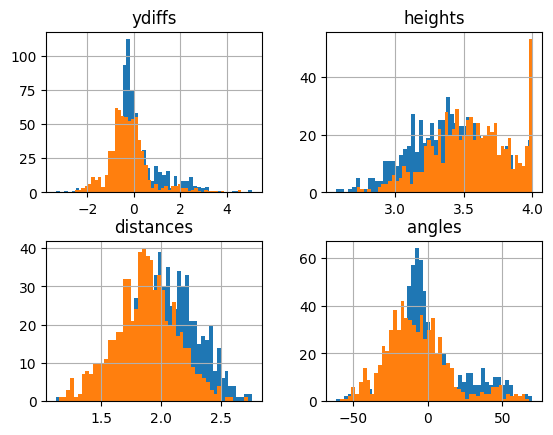

In [7]:
# Plot hist
ax = df1.hist(bins=50, label=1)
ax = dfm1.hist(bins=50, ax=ax, label=-1)

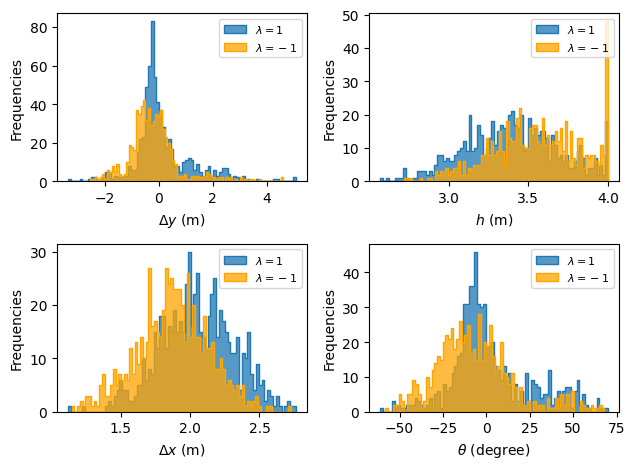

In [14]:
plt.Figure(figsize=(50, 50))
labels = [r"$\Delta y$ (m)", r"$h$ (m)", r"$\Delta x$ (m)", r"$\theta$ (degree)"]
common_params = {
    "element":"step",
    "bins":80}
for i,col in enumerate(df1.columns):
    ax_col = plt.subplot(2,2,i+1)
    sn.histplot(dfs[1][col], ax=ax_col,**common_params)
    sn.histplot(dfs[-1][col], ax=ax_col, color='orange', **common_params)
#     sn.histplot(dfs[0][col], ax=ax_col, color='darkgreen', alpha=.4, element="step", bins=80)
#     ax_col.legend([f"$\lambda={1}$", f"$\lambda={-1}$"])
    ax_col.set_xlabel(labels[i])
    ax_col.set_ylabel("Frequencies")
    ax_col.legend([f"$\lambda={1}$", f"$\lambda={-1}$"], loc='best', fontsize=8)
# ax_col.legend(bbox_to_anchor=(1, 1))

plt.tight_layout()
# plt.savefig("images/NoCurr42d_env_distribution.pdf", dpi=70)

In [9]:
# pd.DataFrame(dfs["1"].median()).transpose().index
med_df = pd.DataFrame({lam:dfs[lam].median() for lam in auxs}).transpose()
med_df.index.name = r"$\lambda$"
med_df.index = med_df.index.format(":.1f")[1:]
# print(med_df.to_latex(float_format="%.3f"))
med_df


,ydiffs,heights,distances,angles
-5.0,0.004228,3.547064,1.890831,0.111775
-2.0,-0.372419,3.560081,1.897177,-11.014440
-1.0,-0.323946,3.548198,1.874250,-9.737741
-0.5,-0.295754,3.535862,1.904369,-8.994198
0.0,-0.102591,3.490272,1.922067,-3.006550
0.5,0.276117,3.428534,1.941408,7.959216
1.0,-0.124537,3.397961,2.041233,-3.468334
2.0,-0.349920,3.712167,2.794614,-7.256862
5.0,0.191968,4.000000,3.000000,3.681742


In [10]:
np.array(med_df.index, dtype=float)

array([-5. , -2. , -1. , -0.5,  0. ,  0.5,  1. ,  2. ,  5. ])

# Medians of the parameters of the test environments

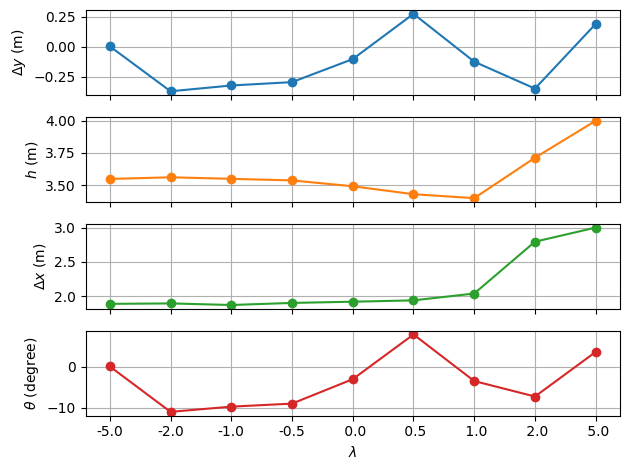

In [15]:
axs = med_df.plot(kind="line", marker="o", subplots=True, layout=(4,1), legend=None).reshape(-1)
# labels = [r"$\Delta y$ (m)", r"$\Delta h$ (m)", r"$\Delta x$ (m)", r"$\theta$ (degree)"]
for i, ax in enumerate(axs):
    ax.set_ylabel(labels[i])
    ax.set_xlabel(r"$\lambda$")
    ax.grid()
    ax.set_xlim
plt.tight_layout()
plt.savefig("images/Median_plot_NoCurr42d.pdf")

In [12]:
std_df = pd.DataFrame({lam:dfs[lam].std() for lam in auxs}).transpose()
std_df.index.name = r"$\lambda$"
std_df.index = std_df.index.format(":.1f")[1:]
std_df.iloc[2:-2,]

,ydiffs,heights,distances,angles
-1.0,0.920634,0.277600,0.258513,22.234374
-0.5,0.915623,0.279940,0.269725,22.281226
0.0,0.987255,0.287184,0.266269,23.253436
0.5,1.209003,0.289551,0.264504,26.601491
1.0,1.051064,0.292092,0.266684,22.991374
